In [1]:
## assi 2

def mc_cu(x1,x2):
    w1 = -1
    w2 = 1

    theta = 0

    w_sum = x1*w1 + x2*w2

    op = 0 if w_sum >= theta else 1
    return op

inputs = [(1,1),(1,0),(0,1),(0,0)]

for x1,x2 in inputs:
    res = mc_cu(x1,x2)
    print(f'{x1} and {x2} is {res}')

1 and 1 is 0
1 and 0 is 1
0 and 1 is 0
0 and 0 is 0


In [2]:
## assi 3 

import numpy as np

class Perceptron:
    def __init__(self,input_size):
        self.weight = np.zeros(input_size + 1)
    
    def predict(self,inputs):
        sum = np.dot(inputs, self.weight[1:]) + self.weight[0]
        return 1 if sum >=0 else 0
    
    def train(self,inputss,labels,epochs):
        for _ in range(epochs):
            for inputs,label in zip(inputss,labels):
                prediction = self.predict(inputs)
                self.weight[1:] += (label-prediction) * np.array(inputs)
                self.weight[0] += (label-prediction) 
inputss = ([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
])
labels = [0,1,0,1,0,1,0,1,0,1] # 0 = even and 1 = odd
perceptron = Perceptron(len(inputss[0]))
perceptron.train(inputss,labels,epochs = 100)

test = ([
    [0,1,0],
    [1,1,1],
    [1,1,0],
    [1,1,0]
])
for inputs in test:
    res = perceptron.predict(inputs)
    no = ''.join(str(bit) for bit in inputs)
    print(f"the no {no} is {'odd' if res == 1 else 'even'}")

the no 010 is even
the no 111 is odd
the no 110 is even
the no 110 is even


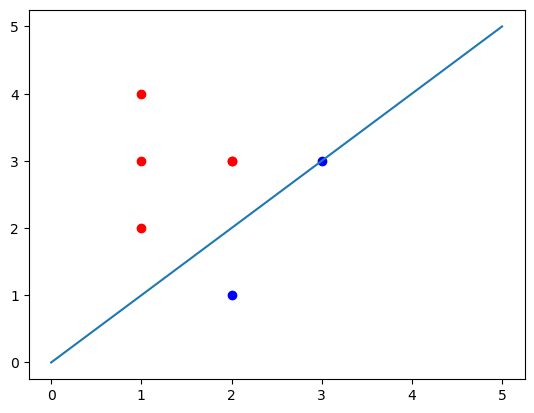

In [3]:
## assin 4

import numpy as np
import matplotlib.pyplot as plt

# define the dataset
data = np.array([
    [1, 2, -1],
    [2, 3, -1],
    [3, 3, 1],
    [2, 1, 1],
    [1, 4, -1],
    [2, 3, -2],
    [1, 3, -1],
])

# separate data and labels
X = data[:, :-1]
y = data[:, -1]

# initialize weights
w = np.zeros(len(X[0]))
learning_rate = 0.1
epochs = 100

# Perceptron learning algorithm
for epoch in range(epochs):
    #2d arry
    for i, x in enumerate(X):
        if (np.dot(X[i], w) * y[i]) <= 0:
            w = w + learning_rate * X[i] * y[i]

# plot the data
for i, x in enumerate(X):
    if y[i] > 0:
        plt.scatter(x[0], x[1], color='b')
    else:
        plt.scatter(x[0], x[1], color='r')

# plot the decision boundary
x = np.linspace(0, 5)
y = (-w[0] * x) / w[1]
plt.plot(x, y)
plt.show()


In [1]:
## assin 7

import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        # Initialize weights with random values
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        
        # Initialize biases with zeros
        self.bias1 = np.zeros((1, self.hidden_size))
        self.bias2 = np.zeros((1, self.output_size))
        
    def forward_propagation(self, X):
        self.hidden_layer = np.dot(X, self.weights1) + self.bias1
        self.hidden_activation = self.sigmoid(self.hidden_layer)
        self.output_layer = np.dot(self.hidden_activation, self.weights2) + self.bias2
        self.output_activation = self.sigmoid(self.output_layer)
        return self.output_activation
    
    def backward_propagation(self, X, y, output_activation, learning_rate):
        error = y - output_activation
        delta_output = error * self.sigmoid_derivative(output_activation)
        
        error_hidden = delta_output.dot(self.weights2.T)
        delta_hidden = error_hidden * self.sigmoid_derivative(self.hidden_activation)
        
        self.weights2 += self.hidden_activation.T.dot(delta_output) * learning_rate
        self.bias2 += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
        
        self.weights1 += X.T.dot(delta_hidden) * learning_rate
        self.bias1 += np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate
        
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output_activation = self.forward_propagation(X)
            self.backward_propagation(X, y, output_activation, learning_rate)
        
    def predict(self, X):
        output_activation = self.forward_propagation(X)
        predictions = np.round(output_activation)
        return predictions
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)


# Example usage
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create a neural network with 2 input neurons, 2 hidden neurons, and 1 output neuron
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)

# Train the neural network
nn.train(X, y, epochs=10000, learning_rate=0.1)

# Make predictions
predictions = nn.predict(X)
print(predictions)


[[0.]
 [1.]
 [1.]
 [0.]]


In [ ]:
### ANN A7 and B1 practice

import numpy as np

class NeuralNetwork:
    def __init__(self,input_size,hidden_size,output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.w1 = np.random.rand(input_size,hidden_size)
        self.w2 = np.random.rand(hidden_size,output_size)
        
        self.b1 = np.zeros((1,hidden_size))
        self.b2 = np.zeros((1,output_size))
        
    def Feedforward(self,X):
        
        self.hidden_layer = np.dot(X,self.w1) + self.b1
        self.hidden_layer_acti = self.sigmoid(self.hidden_layer)
        self.output_layer = np.dot(self.hidden_layer_acti,self.w2) + self.b2
        self.output_layer_acti = self.sigmoid(self.output_layer)
        return self.output_layer_acti
    
    def Backpropagation(self,X,y,output_activation,l_rate):
        error = y - output_activation
        delta_op = error * self.sigmoid_der(output_activation)
        
        error_hidden = delta_op.dot(self.w2.T)
        delta_hidden = error_hidden * self.sigmoid_der(self.hidden_layer_acti)
        
        self.w2 += self.hidden_layer_acti.T.dot(delta_op) * l_rate
        self.b2 += np.sum(delta_op,axis=0,keepdims=True) * l_rate
        
        self.w1 += X.T.dot(delta_hidden) * l_rate
        self.b1 += np.sum(delta_hidden,axis = 0,keepdims=True) * l_rate
        
    def train(self,X,y,epochs,l_rate):
        for epoch in range(epochs):
            output_activation = self.Feedforward(X)
            self.Backpropagation(X, y, output_activation, l_rate)
    
    def predict(self,X):
        output_activation = self.Feedforward(X)
        prediction = np.round(output_activation)
        return prediction
    
    def sigmoid(self,X):
        return 1 / (1 + np.exp(-X))
    
    def sigmoid_der(self,X):
        return X * (1- X)
    
x = np.array([[0,0],[1,0],[0,1],[1,1]])

y = np.array([[0],[1],[1],[0]])

nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)

nn.train(x, y, epochs = 10000, l_rate = 0.1)

prediction = nn.predict(x)
print(prediction)

[[0.]
 [1.]
 [1.]
 [0.]]


In [19]:
### assin c2

import tensorflow as tf
from tensorflow import keras
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

model = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(2, (3,3), input_shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

y_pred = np.argmax(model.predict(x_test), axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2360 - accuracy: 0.9305 - val_loss: 0.1345 - val_accuracy: 0.9602
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1003 - accuracy: 0.9696 - val_loss: 0.0890 - val_accuracy: 0.9712
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0690 - accuracy: 0.9786 - val_loss: 0.0887 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0493 - accuracy: 0.9846 - val_loss: 0.0782 - val_accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0369 - accuracy: 0.9879 - val_loss: 0.0858 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0302 - accuracy: 0.9899 - val_loss: 0.0818 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0908 - val_ac

0.977

In [20]:
### assin A8

import pandas as pd
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Epoch 1/50
3/3 [==============================] - 1s 81ms/step - loss: 1.0467 - accuracy: 0.3333 - val_loss: 1.0140 - val_accuracy: 0.3333
Epoch 2/50
3/3 [==============================] - 0s 20ms/step - loss: 0.9831 - accuracy: 0.4271 - val_loss: 0.9639 - val_accuracy: 0.4583
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.9239 - accuracy: 0.6146 - val_loss: 0.9192 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.8662 - accuracy: 0.6667 - val_loss: 0.8761 - val_accuracy: 0.5417
Epoch 5/50
3/3 [==============================] - 0s 22ms/step - loss: 0.8141 - accuracy: 0.6875 - val_loss: 0.8349 - val_accuracy: 0.5417
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 0.7649 - accuracy: 0.7083 - val_loss: 0.7971 - val_accuracy: 0.5417
Epoch 7/50
3/3 [==============================] - 0s 16ms/step - loss: 0.7203 - accuracy: 0.7396 - val_loss: 0.7631 - val_accuracy: 0.5833
Epoch 8/50
3/3 [===========

In [2]:
### Assin ART
import numpy as np

class ART1:
    def __init__(self, input_size, rho):
        self.rho = rho
        self.input_size = input_size
        self.w = np.ones((input_size, ))

    def train(self, X):
        for i in range(X.shape[0]):
            self._train_single(X[i])

    def _train_single(self, X):
        while True:
            y = self.predict(X)
            if np.sum(X[self.w==y]) / np.sum(X) >= self.rho:
                self.w = X
                break

    def predict(self, X):
        y = np.dot(X, self.w)
        return np.where(y > 0.5, 1, 0)  # Use a threshold of 0.5

# Training data
X = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

# Initialize the network
art1 = ART1(input_size=X.shape[1], rho=0.6)

# Train the network
art1.train(X)

# Test the network
print(art1.predict([0, 1, 1]))

1
